In [19]:
# Title: Logistic Regression for churn dataset
# Author: Zhu Haoxiang

In [ ]:
# import packages

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from xgboost import plot_importance
import sklearn.metrics as metrics

In [ ]:
# Read files

In [ ]:
churn = pd.read_csv("Churn_Modelling.csv")
churn.Gender[churn.Gender == "Male"] = 0
churn.Gender[churn.Gender == "Female"] = 1
churn['Bal/Sal'] = churn['Balance']/churn['EstimatedSalary']
churn = churn.dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# 3. Unbalanced data

In [ ]:
num_exit = sum(churn.Exited==1)
data_no_exit = churn.loc[churn["Exited"] == 0]
data_exit = churn.loc[churn["Exited"] == 1]

sampled_data_no_exit = data_no_exit.sample(n=num_exit, random_state=2020)

churn_balanced = sampled_data_no_exit.append(data_exit)

In [ ]:
print(len(data_no_exit))
print(len(data_exit))

7963
2037


In [ ]:
# 4. Filter X and y

In [ ]:
X = churn_balanced.drop(columns=["Exited"])
X = np.array(X)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
y = np.array(churn_balanced["Exited"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2020)

In [ ]:
clf = XGBClassifier(learning_rate = 0.1, max_depth = 5, alpha = 30, n_estimators = 30, random_state=2020)
clf.fit(X_train, y_train)

XGBClassifier(alpha=30, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2020,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
sum(y_pred == y_test) / len(y_test)

0.7718724448078496

In [ ]:
confusion_matrix(y_test, y_pred)

array([[487, 136],
       [143, 457]])

In [ ]:
# Features Importance

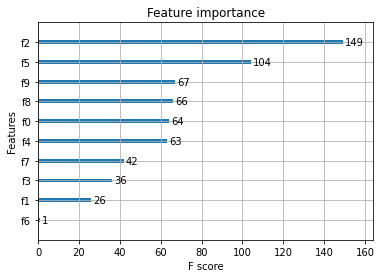

In [ ]:
plot_importance(clf)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.77959184 0.76734694 0.77142857 0.75819672 0.74180328]
Accuracy: 0.76 (+/- 0.03)


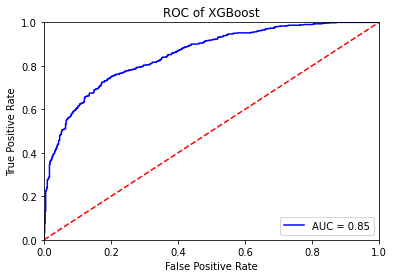

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC of XGBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()